In [1]:
import os 
from os import listdir 
from os.path import isfile, join
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img

matrix = []

for filename in os.listdir('Train1'):
    face = img.imread((os.path.join('Train1',filename)))
    img2 = np.array(face).flatten()
    matrix.append(img2)
    
# image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg') ## Load an image as numpy array
# plt.imshow(image, interpolation='nearest') #display the image 
# plt.gray()  #grayscale conversion
# plt.show()

# img2 = image.flatten()



In [2]:
# read the first 10 rows and columns of the image
matrix

[array([130, 128, 127, ..., 129, 129, 129], dtype=uint8),
 array([133, 124, 129, ..., 130, 130, 130], dtype=uint8),
 array([127, 129, 133, ..., 129, 129, 129], dtype=uint8),
 array([129, 137, 123, ..., 130, 130, 130], dtype=uint8),
 array([132, 132, 135, ..., 130, 130, 130], dtype=uint8),
 array([129, 129, 129, ..., 129, 129, 129], dtype=uint8),
 array([133, 130, 130, ..., 129, 129, 129], dtype=uint8),
 array([131, 130, 130, ..., 131, 131, 131], dtype=uint8),
 array([128, 134, 133, ..., 130, 130, 130], dtype=uint8),
 array([127, 134, 120, ..., 128, 128, 128], dtype=uint8),
 array([128, 126, 127, ..., 128, 128, 128], dtype=uint8),
 array([136, 130, 129, ..., 129, 129, 129], dtype=uint8),
 array([125, 129, 131, ..., 129, 129, 129], dtype=uint8),
 array([125, 132, 120, ..., 128, 128, 128], dtype=uint8),
 array([125, 132, 120, ..., 128, 128, 128], dtype=uint8),
 array([130, 122, 129, ..., 129, 129, 129], dtype=uint8),
 array([124, 126, 129, ..., 129, 129, 129], dtype=uint8),
 array([128, 1

In [3]:
faces_matrix = np.vstack(matrix)
faces_matrix
faces_matrix.shape

(3772, 19500)

In [4]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape


(19500,)

(3772, 19500)

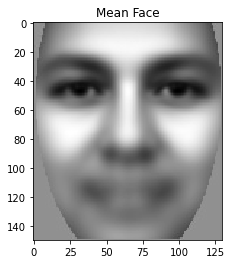

In [5]:
plt.imshow(mean_face.reshape(150,130),interpolation='nearest');
plt.gray()
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

In [6]:
#calculating the covariance but differently
# cov = (faces_norm.T @ faces_norm) / (faces_norm.shape[0]-1)

eigen_vecs, eigen_vals, yuna_val = np.linalg.svd(faces_norm)
eigen_vecs.shape



# A = np.transpose(faces_norm)
# u = A.dot(faces_norm)
# eigen_vals, eigen_vecs = np.linalg.eig(np.matmul(faces_norm.T,faces_norm)) 

# eigen_vecs

# A = np.transpose(faces_norm) @ A 

# u.shape
# eigen_vecs,eigen_vals = np.linalg.svd(faces_norm.T)



(3772, 3772)

In [9]:
M = faces_norm.T @ faces_norm

In [8]:
print(len(faces_norm[0]))
print(len(faces_norm))
print(eigen_vecs.shape)
print(eigen_vals.shape)
print(yuna_val.shape)

19500
3772
(3772, 3772)
(3772,)
(19500, 19500)


In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(M)
# # M.shape
eigen_vecs
# # eigen_vals

Text(0.5, 0.98, 'First 10 Eigenfaces')

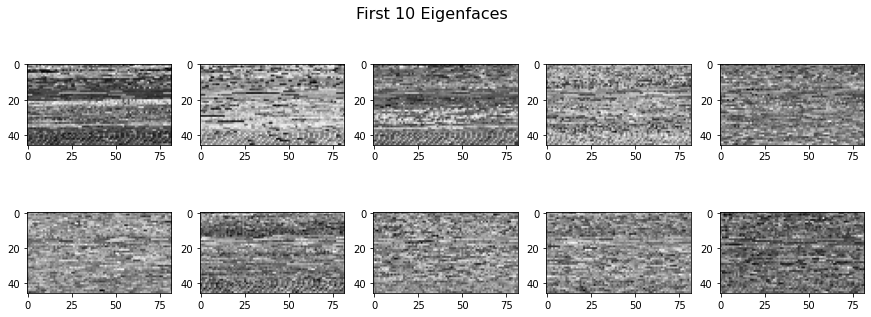

In [16]:

fig, axs = plt.subplots(1,3,figsize=(15,5))

for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(46,82)
    plt.imshow(img, cmap='gray')
    
fig.suptitle("First 10 Eigenfaces", fontsize=16)

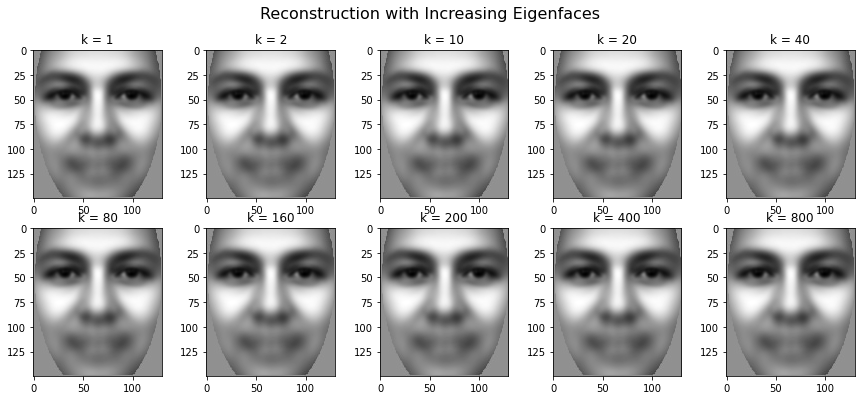

In [11]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(150,130)+mean_face.reshape(150,130),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);